In [1]:
install.packages('quantmod')
library(quantmod)

package 'quantmod' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\HP\AppData\Local\Temp\RtmpMha4dl\downloaded_packages


Warning message:
"package 'quantmod' was built under R version 3.6.3"Loading required package: xts
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Loading required package: TTR
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


In [73]:
BTC3 <- getSymbols("ACWI",src="yahoo",auto.assign=FALSE)
BTC3 <- na.omit(BTC3)
BTC3 <- BTC3["2008-04-31/2020-01-10"]
head(BTC3)

           ACWI.Open ACWI.High ACWI.Low ACWI.Close ACWI.Volume ACWI.Adjusted
2008-03-28     50.10     50.10    50.10      50.10         200      38.93677
2008-03-31     50.00     50.00    49.32      49.32         400      38.33056
2008-04-01     50.25     50.65    50.16      50.65         600      39.36421
2008-04-02     51.12     51.40    51.05      51.21       10700      39.79943
2008-04-03     59.70     59.70    50.95      51.50       29100      40.02483
2008-04-04     54.95     54.95    51.47      51.47        9900      40.00151

In [74]:
#BTC1 <- getSymbols("XWD.TO",src="FRED",auto.assign=FALSE)
#BTC1 <- na.omit(BTC1)
#BTC1 <- BTC1["2019-12-31/2021-03-08"]
#names(BTC1) <- "TR" # Naming our column Close Price as "TR"
#head(BTC1)

In [75]:
BTC3 <- BTC3[ ,-c(2,3,4,5)]
head(BTC3)

           ACWI.Open ACWI.Adjusted
2008-03-28     50.10      38.93677
2008-03-31     50.00      38.33056
2008-04-01     50.25      39.36421
2008-04-02     51.12      39.79943
2008-04-03     59.70      40.02483
2008-04-04     54.95      40.00151

In [76]:
head(BTC3)

           ACWI.Open ACWI.Adjusted
2008-03-28     50.10      38.93677
2008-03-31     50.00      38.33056
2008-04-01     50.25      39.36421
2008-04-02     51.12      39.79943
2008-04-03     59.70      40.02483
2008-04-04     54.95      40.00151

In [77]:
BTC3 <- BTC3[ ,-c(1)]
head(BTC3)

           ACWI.Adjusted
2008-03-28      38.93677
2008-03-31      38.33056
2008-04-01      39.36421
2008-04-02      39.79943
2008-04-03      40.02483
2008-04-04      40.00151

In [78]:
colnames(BTC3)[colnames(BTC3) == "ACWI.Adjusted"] <- "TR"

In [79]:
head(BTC3)

                 TR
2008-03-28 38.93677
2008-03-31 38.33056
2008-04-01 39.36421
2008-04-02 39.79943
2008-04-03 40.02483
2008-04-04 40.00151

In [80]:
logret <- diff(log(BTC3$TR))  # diff function gives us the return
head(logret,3)

                    TR
2008-03-28          NA
2008-03-31 -0.01569153
2008-04-01  0.02660962

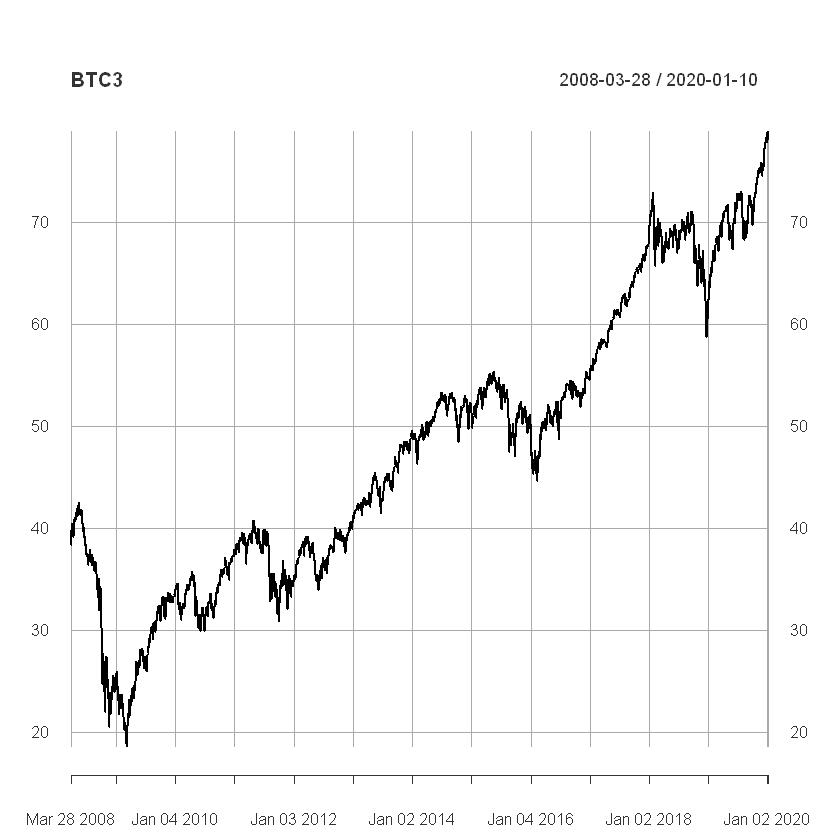

In [81]:
plot(BTC3)

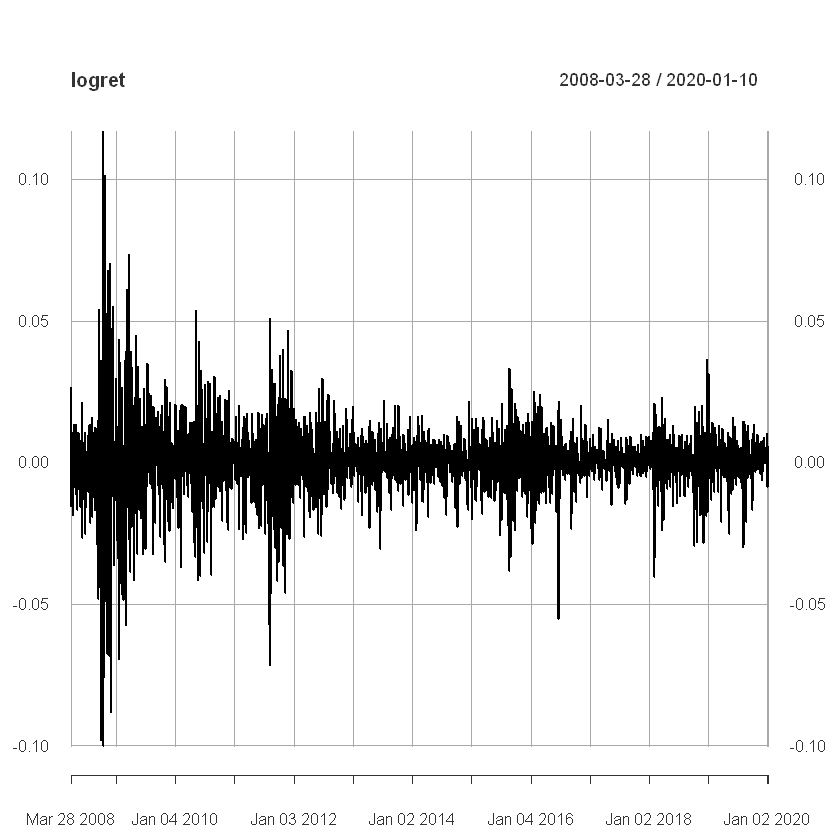

In [82]:
plot(logret)

In [83]:
# The R code to find log-return, removing missing First Observation

logret <- diff(log(BTC3$TR))[-1]
round(head(logret,3),6)   # round function to display 6 decimals

# First Value interpretation 
# Stock-index fell by 1.5%

                  TR
2008-03-31 -0.015692
2008-04-01  0.026610
2008-04-02  0.010996

In [84]:
# Now Calculate the discreet Return from the formula of exp.
ret <- exp(logret)-1  #To go from log return to simple return,
round(head(ret,3),6)

                  TR
2008-03-31 -0.015569
2008-04-01  0.026967
2008-04-02  0.011056

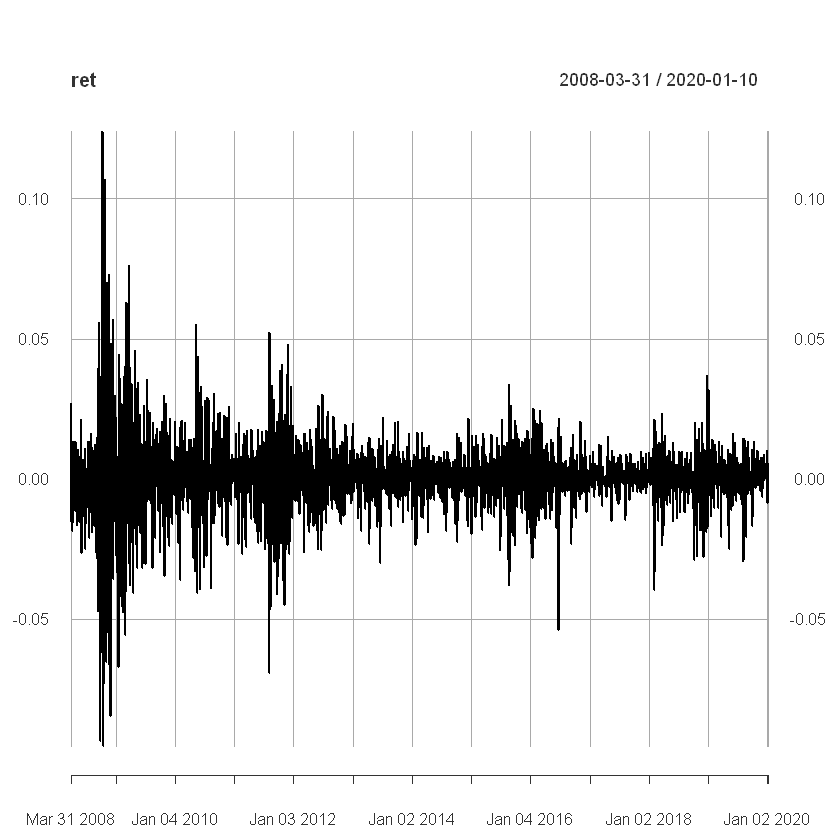

In [85]:
plot(ret)

In [86]:
# Weekly log-return

logret_w <- apply.weekly(BTC3,sum)

round(head(logret_w,3),6)

                  TR
2008-03-28  38.93677
2008-04-04 197.52054
2008-04-11 199.27693

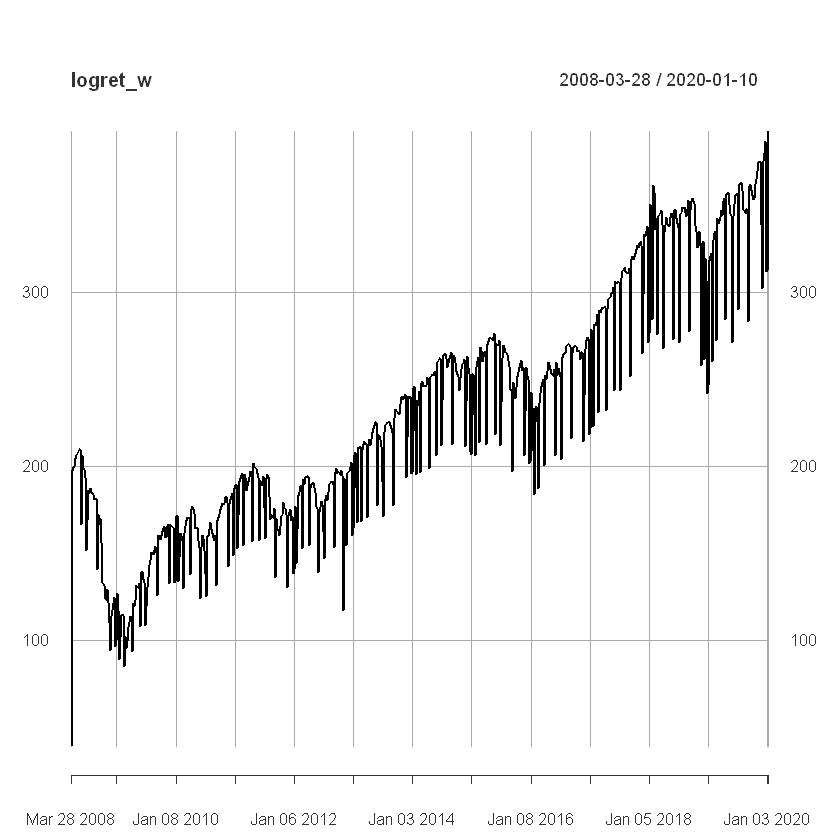

In [87]:
plot(logret_w)

In [88]:
# Calculate discrete return from log-return

ret_w <- exp(logret_w)-1

round(tail(ret_w,3),6)

                      TR
2019-12-27 3.456991e+135
2020-01-03 6.238685e+135
2020-01-10 2.888884e+170

In [89]:
#if the returns distribition are normal it is easy to find out VAR & ES

In [90]:
#monthly
logret_w1 <- apply.monthly(BTC3,sum)

round(head(logret_w1,3),6)

                  TR
2008-03-31  77.26733
2008-04-30 886.16494
2008-05-30 875.88281

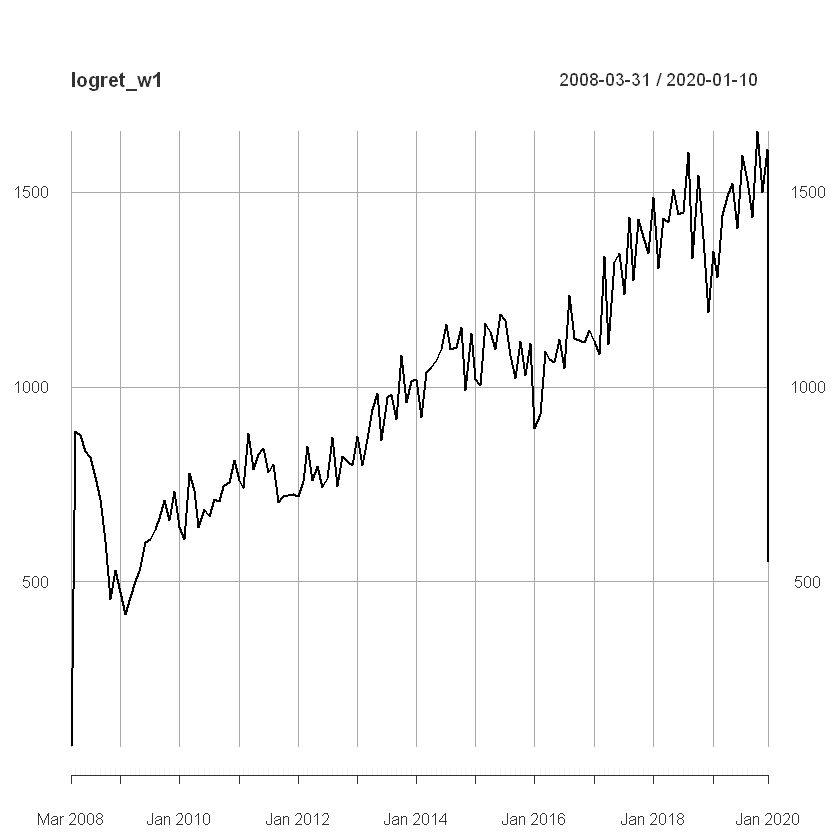

In [91]:
plot(logret_w1)

In [92]:
# Distribution of log-returns
# ESTIMATE U -using sample mean  and sigma using std. deviation

mu <- round(mean(logret),8)

sig <- round(sd(logret),8)

mu
sig

[1] 0.00023726

[1] 0.01299233

In [93]:
var <- round(qnorm(0.05,mu,sig),6)   # quantile for the normal distribution only  # VAR value is -2.2%
var

[1] -0.021133

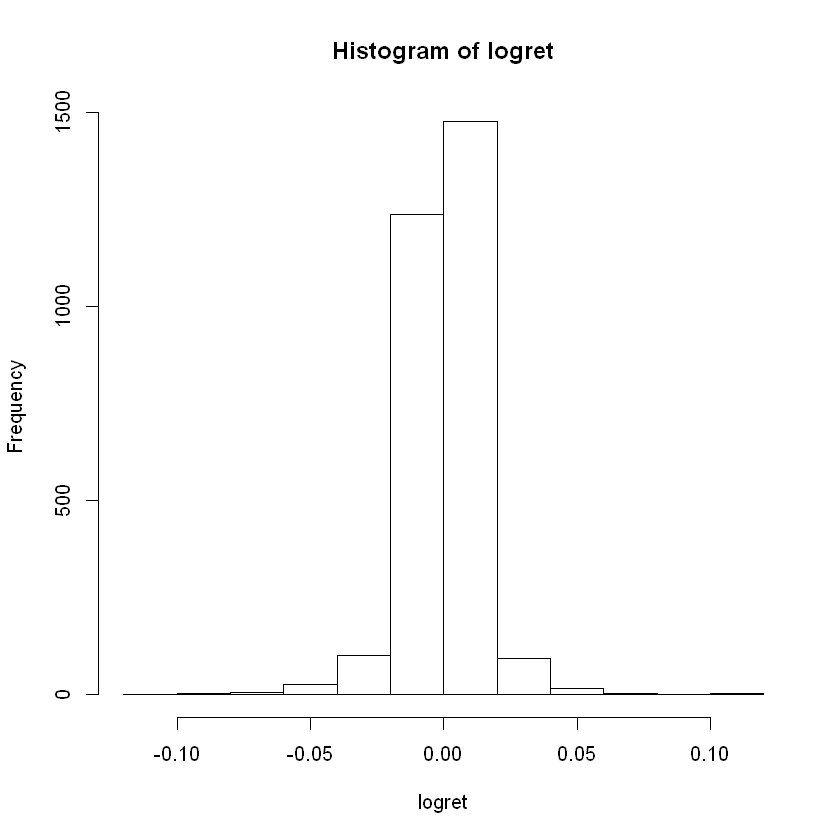

In [94]:
hist(logret)

In [95]:
(exp(var)-1) # First convert var into discrete returns

[1] -0.02091126

In [96]:
(exp(var)-1) * 1000000

[1] -20911.26

In [97]:
# ES - If the outcome were to be worse than -2.2% then the ES is the expected loss

In [98]:
# Calculating 1-day 95% Expected Shortfall for alpha = 0.05 during the case of normal distribution
es <- mu-sig*dnorm(qnorm(0.05,0,1),0,1)/0.05
es
# It means if the log-return is worse than -2.2% then the avg. loss is abt -2.7%

[1] -0.02656219

In [99]:
# Next wld be predicting AR & ES based on Simulations - Up untill now we consider the Normality Assumptions
# Week 3

In [100]:
install.packages('moments')
library(moments)


Warning message:
"package 'moments' is in use and will not be installed"

In [101]:
install.packages('metRology')
library(metRology)

Warning message:
"package 'metRology' is in use and will not be installed"

In [102]:
library(rugarch)

In [103]:
# Draw 100,000 outcomes from the N(mu,sig) distribution
alpha <- 0.05
set.seed(123789)    #seed value tells the computer where to start the sequence # if i do not set , then each time i get diff.set

rvec <- rnorm(100000,mu,sig)# Get a 100000 rando no.s from a random distribution   # So the result wld be different everytime

VAR <- quantile(rvec,alpha)

ES <- mean(rvec[rvec<VAR])

round(VAR,6)

round(ES,6)
# Simulation method will not give us the exact correct value as it takes an assumption on the mean and std.-deviation

5% 
-0.021243

[1] -0.02682

In [104]:
#The objective of the class is - How to re-scale the t-distribution with U , STD. dev , Kurtosis , skewness, d.o.f.
#To match the original distribution of the data
#It provides accurate VAR & Es for our data

## Re-scaledt-distribution model
# We use M-L method
# Use the fit-distribution function

In [105]:
library(MASS)
rvec <- as.vector(logret) #Using ML method and finding the best parameters
t.fit <- fitdistr(rvec,"t")
round(t.fit$estimate,6)

Warning message in dt((x - m)/s, df, log = TRUE):
"NaNs produced"Warning message in dt((x - m)/s, df, log = TRUE):
"NaNs produced"Warning message in log(s):
"NaNs produced"Warning message in log(s):
"NaNs produced"Warning message in log(s):
"NaNs produced"Warning message in log(s):
"NaNs produced"Warning message in log(s):
"NaNs produced"Warning message in dt((x - m)/s, df, log = TRUE):
"NaNs produced"Warning message in dt((x - m)/s, df, log = TRUE):
"NaNs produced"Warning message in log(s):
"NaNs produced"Warning message in log(s):
"NaNs produced"Warning message in log(s):
"NaNs produced"Warning message in log(s):
"NaNs produced"Warning message in log(s):
"NaNs produced"Warning message in log(s):
"NaNs produced"Warning message in log(s):
"NaNs produced"Warning message in log(s):
"NaNs produced"Warning message in log(s):
"NaNs produced"Warning message in log(s):
"NaNs produced"Warning message in log(s):
"NaNs produced"Warning message in log(s):
"NaNs produced"Warning message in dt((x -

m        s       df 
0.000791 0.006946 2.507744

In [106]:
# Estimating VAR and ES for student-t distribution with the above parameters
alpha <- 0.05
set.seed(123789)
#install.packages('metRology')
#library(metRology)
rvec <- rt.scaled(100000,mean=t.fit$estimate[1],sd=t.fit$estimate[2],df=t.fit$estimate[3])
# We use rt.scaled fx to simulate data from the re-scaled t-distribution using the estimated parameters
# fIRST argument is- The no. of outcomes we want in our simulation
VAR <- quantile(rvec,alpha)
ES <- mean(rvec[rvec<VAR])
round(VAR,6)

round(ES,6)

5% 
-0.016856

[1] -0.030565

In [107]:
# Method - B - IID simulation from empirical distribution - simulating from the actual data
alpha <- 0.05
set.seed(123789)
library(metRology)
rvec <- rep(0,100000)
for (i in 1:10){
    rvec <- rvec+sample(as.vector(logret),100000,replace=TRUE)
}
VAR <- quantile(rvec,alpha)
ES <- mean(rvec[rvec<VAR])

VAR
ES

5% 
-0.06628443

[1] -0.09024509

In [108]:
# Method C - Block simulation from empirical distribution
# randomly pick a block of 10 consecutive 1-day log-returns from the actual data.Add them up to get a 10-day log-return
alpha <- 0.05
set.seed(123789)
rvec <- rep(0,100000)
rdat <- as.vector(logret)
posn <- seq(from=1,to=length(rdat)-9,by=1)
rpos <- sample(posn,100000,replace=TRUE)
for (i in 1:10){
    rvec <- rvec+rdat[rpos]
    rpos <- rpos+1
}

VAR <- quantile(rvec,alpha)
ES <- mean(rvec[rvec<VAR])

VAR
ES

5% 
-0.05574425

[1] -0.0954496

In [109]:
# If there is some important time-dependence in our data then method B & C may give different answers

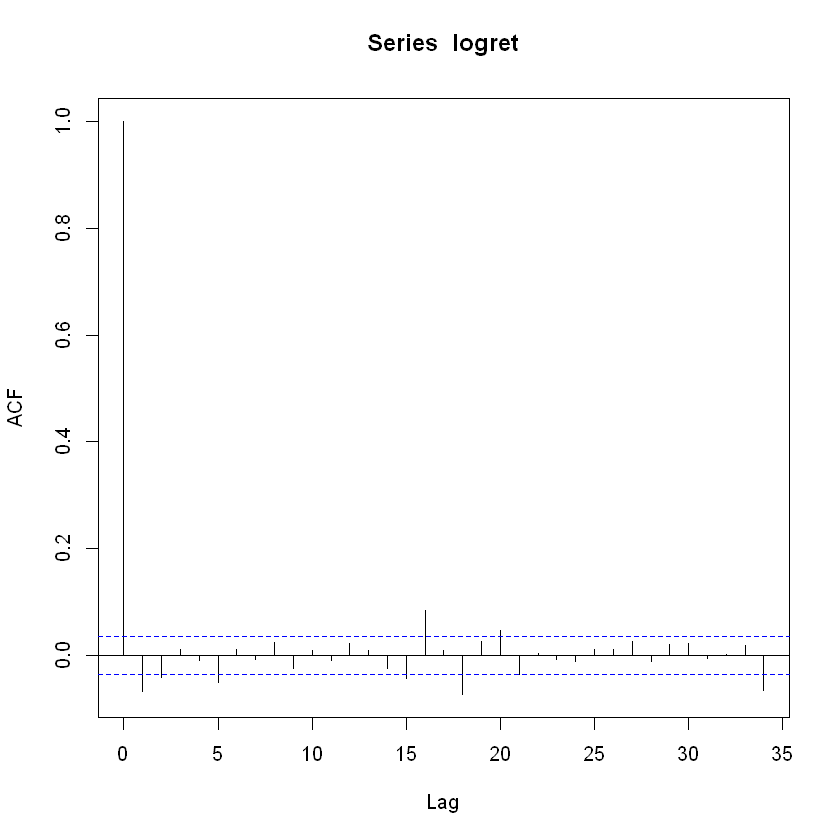

In [110]:
# Auto-correlation f(x) of logret
acf(logret) # dashed lines - 95% confidence band for the acf around 0 - As if it is outside the band - then there is significant
# Serial correlation

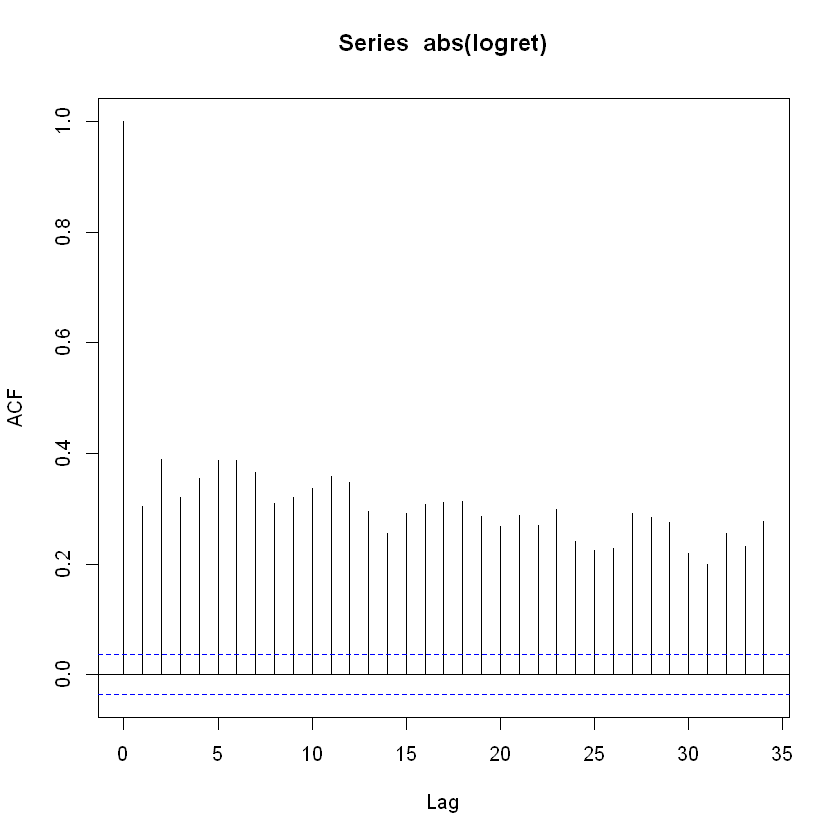

In [111]:
# Volatility Clustering
# ACF for NTC daily log-returns
acf(abs(logret)) # absolute value

In [112]:
#High serial correlations , so predictable #Testing for 2nd assumptions - above & Next below

#absolute - Large returns whether +ve /-ve = Tend to be followed by large returns- 
#This is what happens when data has clusters of volatility

#Daily index of MSCI-Devd has strong volatility clustering # Img of logreturns - therefore predictable

In [113]:
#Volatilility which is the standard deviation of log-returns
library(rugarch)

In [114]:
garch.N <- ugarchspec(variance.model = list(model = "sGARCH",garchOrder = c(1,1)),
                     mean.model = list(armaOrder = c(0,0),include.mean = TRUE),
                     distribution.model = "norm")
# saving the model as garch.N

In [115]:
fit.garch.N <- ugarchfit(spec = garch.N,data = logret)
fit.garch.N


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.000619    0.000139   4.4441 0.000009
omega   0.000002    0.000001   1.9873 0.046890
alpha1  0.140997    0.016950   8.3186 0.000000
beta1   0.851369    0.015650  54.3993 0.000000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.000619    0.000119  5.22222 0.000000
omega   0.000002    0.000005  0.37143 0.710320
alpha1  0.140997    0.058503  2.41009 0.015948
beta1   0.851369    0.062463 13.62987 0.000000

LogLikelihood : 9582.835 

Information Criteria
------------------------------------
                    
Akaike       -6.4547
Bayes        -6.4467
Shibata      -6.4547
Hannan-Quinn -6.4518

Weig

In [116]:
# save Fitted Values 
save1 <- cbind(logret,fit.garch.N@fit$sigma,fit.garch.N@fit$z)
names(save1) <- c("logret","s","z")
# we are adding 3 columns logret +  fitted values of sqr root of fitted values of ht
# + Fitted values of et

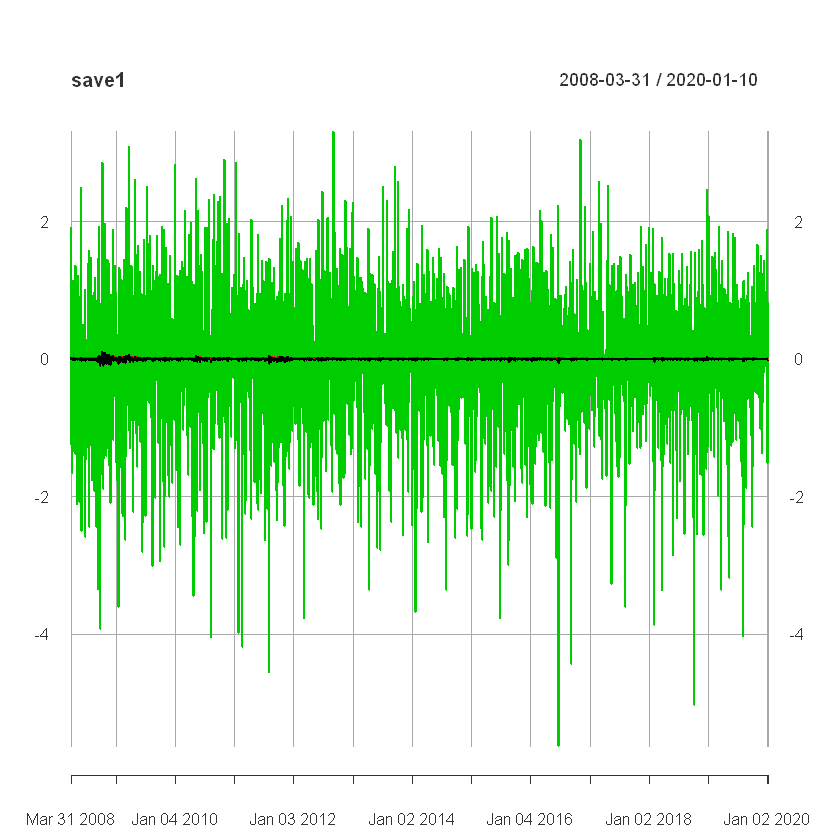

In [117]:
plot(save1)

In [118]:
head(save1)

                  logret          s           z
2008-03-31 -0.0156915339 0.01299576 -1.25509259
2008-04-01  0.0266096155 0.01353492  1.92023831
2008-04-02  0.0109955371 0.01590923  0.65221224
2008-04-03  0.0056472959 0.01524992  0.32970348
2008-04-04 -0.0005826832 0.01426373 -0.08427167
2008-04-07  0.0058113363 0.01324058  0.39212706

In [119]:
#Diagnostic test for the neww fitted et
# Distribution of returns
# ESTIMATE U -using sample mean  and sigma using std. deviation

mu <- round(mean(save1$z),8)

sig <- round(sd(save1$z),8)

mu
sig

[1] -0.04635584

[1] 0.9993186

In [120]:
rvec <- as.vector(save1$z) # Converting into vector
round(skewness(rvec),2) # So left-skewed

[1] -0.56

In [121]:
# If a distribution has fatter tails = Leptokurtic
# # If a distribution has Thinner tails = Platykurtic
rvec <- as.vector(save1$z)
round(kurtosis(rvec),2)

[1] 4.63

In [122]:
# Jarque Bera test for normality

rvec <- as.vector(save1$z)
jarque.test(rvec)  # i.e reject normality


	Jarque-Bera Normality Test

data:  rvec
JB = 487.68, p-value < 2.2e-16
alternative hypothesis: greater


In [123]:
#Now the expected values should have the following statistical properties
#Mean =0
#STD = 1
# Skewness=0
#Kurtosis = 3 # As per the GARCH model specifications 
# While in the previous moels the diagnostic test elements where actuallly better

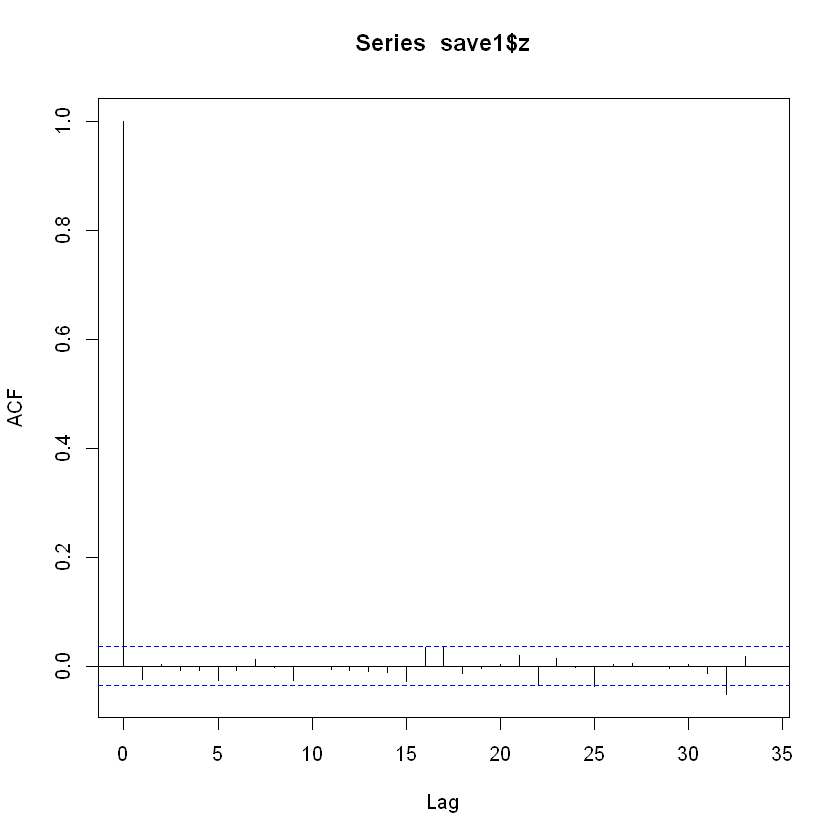

In [124]:
acf(save1$z)

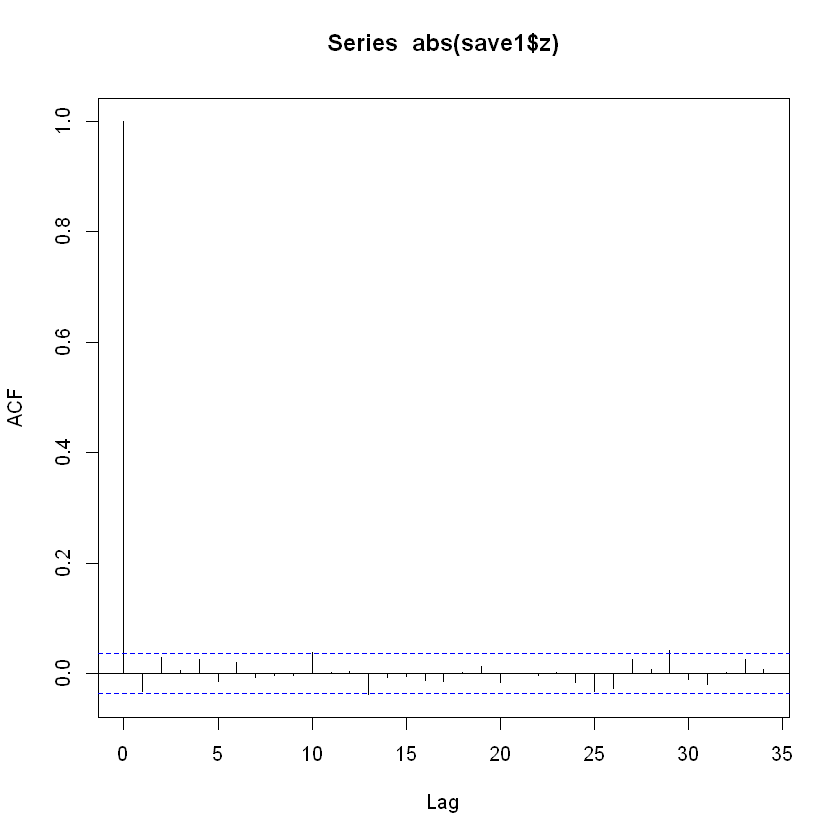

In [125]:
acf(abs(save1$z))

In [126]:
#Till Now we have done with a GARCH(1,1) model a normal-distribution
# Now with a GARCH(1,1) T-distribution

# saving the model as garch.N

In [127]:
#Till Now we have done with a GARCH(1,1) model a normal-distribution
# Now with a GARCH(1,1) T-distribution
garch.t <- ugarchspec(variance.model = list(model = "sGARCH",garchOrder = c(1,1)),
                     mean.model = list(armaOrder = c(0,0),include.mean = TRUE),
                     distribution.model = "std")

fit.garch.t <- ugarchfit(spec = garch.t,data = logret)

fit.garch.t

# saving the model as garch.t


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: std 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.000785    0.000132  5.94632 0.000000
omega   0.000001    0.000003  0.46352 0.642989
alpha1  0.134715    0.059484  2.26473 0.023529
beta1   0.864266    0.051813 16.68064 0.000000
shape   5.860714    1.039819  5.63628 0.000000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.000785    0.000237 3.314688 0.000917
omega   0.000001    0.000036 0.039901 0.968172
alpha1  0.134715    0.667784 0.201734 0.840124
beta1   0.864266    0.585121 1.477074 0.139656
shape   5.860714    9.657419 0.606861 0.543943

LogLikelihood : 9657.353 

Information Criteria
------------------------------------
                 

In [128]:
# save Fitted Values
save2 <- cbind(logret,fit.garch.t@fit$sigma,fit.garch.t@fit$z)
names(save2) <- c("logret","s","z")

parm1 <- fit.garch.t@fit$coef

In [129]:
#Diagnostic test for the neww fitted et
# Distribution of returns
# ESTIMATE U -using sample mean  and sigma using std. deviation

mu <- round(mean(save2$z),8)

sig <- round(sd(save2$z),8)

mu
sig

[1] -0.06558704

[1] 0.9929338

In [130]:
rvec <- as.vector(save2$z) # Converting into vector
round(skewness(rvec),2) # So left-skewed

[1] -0.58

In [131]:
# If a distribution has fatter tails = Leptokurtic
# # If a distribution has Thinner tails = Platykurtic
rvec <- as.vector(save2$z)
round(kurtosis(rvec),2) #Heavy Tailed as it is > than 3 | Normal if = 3 |  < 3 - for thin tailed test

[1] 4.68

In [132]:
# Jarque Bera test for normality

rvec <- as.vector(save2$z)
jarque.test(rvec)  # i.e reject normality


	Jarque-Bera Normality Test

data:  rvec
JB = 515.15, p-value < 2.2e-16
alternative hypothesis: greater


In [133]:
#Now the expected values should have the following statistical properties
#Mean =0
#STD = 1
# Skewness=0
#Kurtosis = 3+6/v-4 # As per the GARCH model specifications 
# While in the previous moels the diagnostic test elements where actuallly better

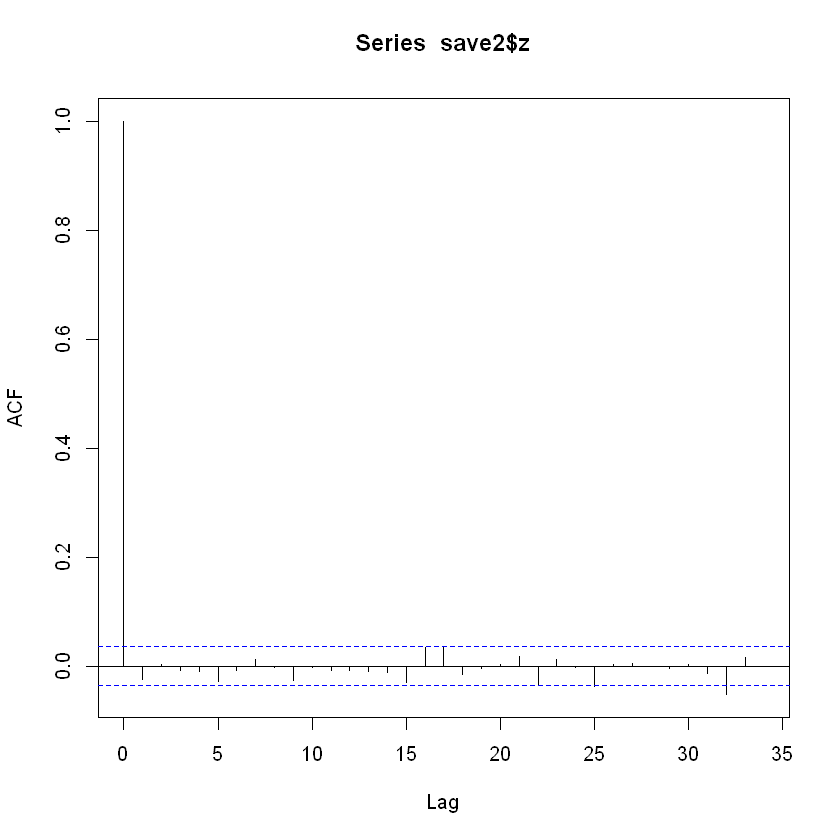

In [134]:
acf(save2$z)

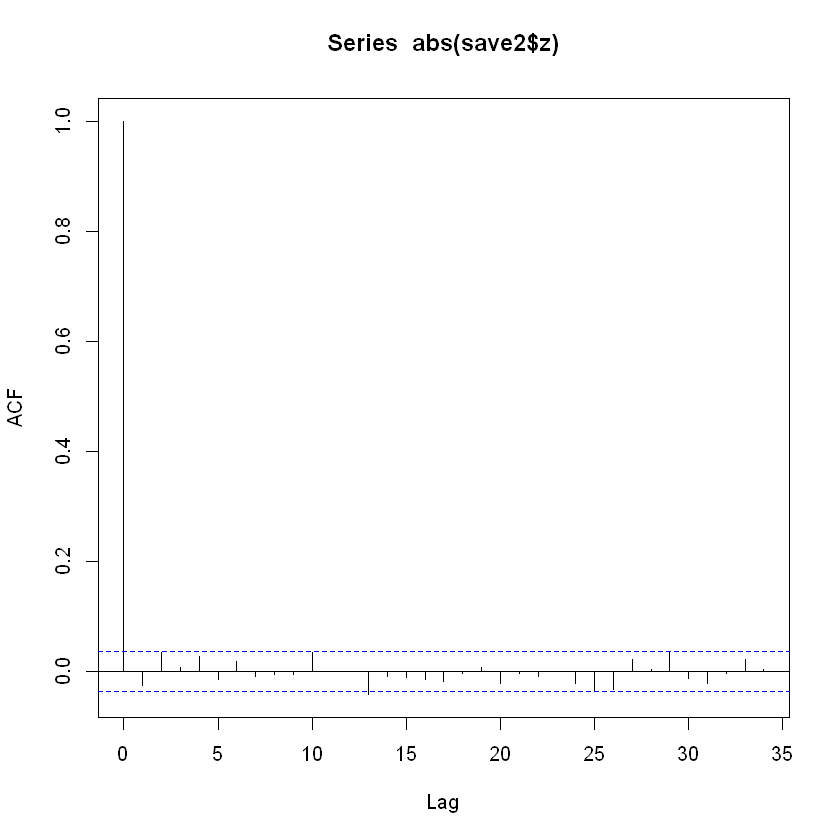

In [135]:
acf(abs(save2$z))

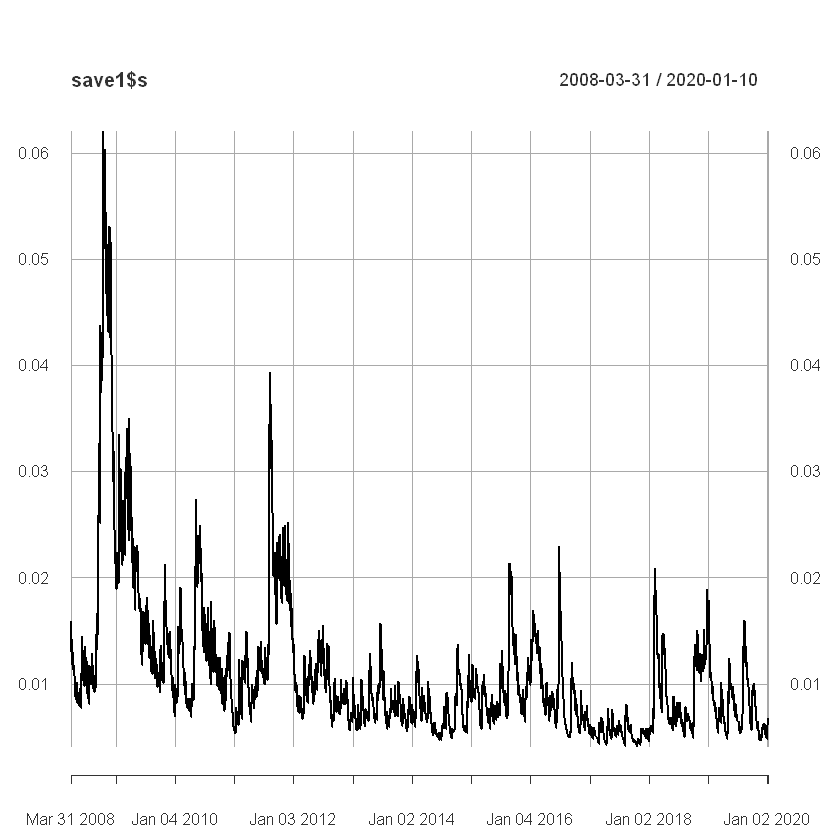

In [136]:
plot(save1$s)

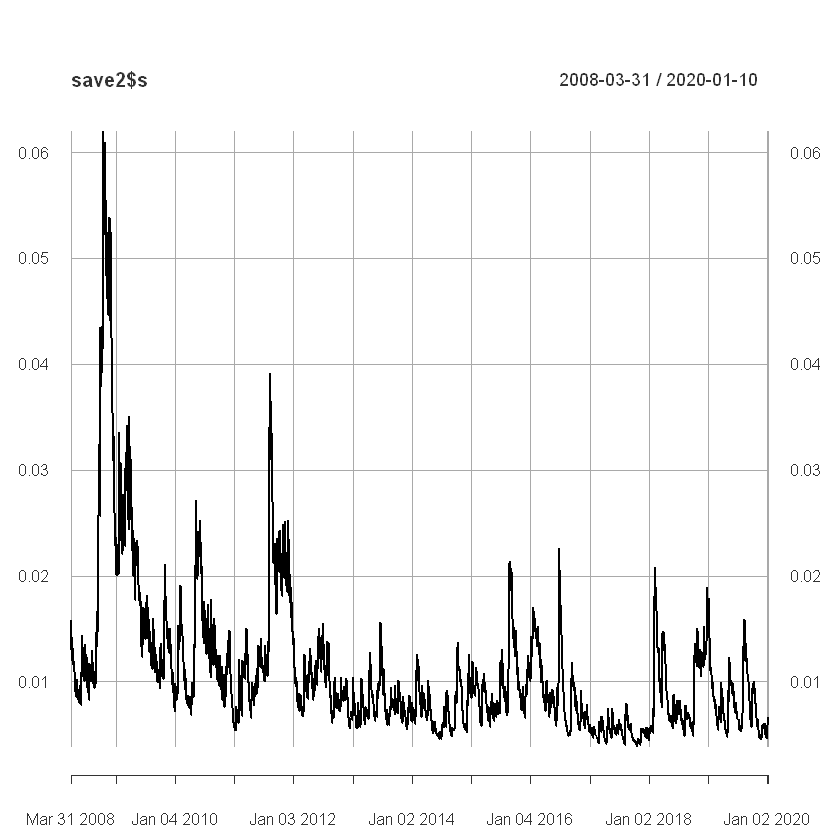

In [137]:
plot(save2$s)

In [138]:
#Graph of fiited sqr. root of ht in both cases - it denotes the volatility clustering in the Bitcoin Prices
# As the volatility is high VAR & ES are going to be High
# As the volatility is low VAR & ES are going to be Low
# So above VAR and ES are going to be high at aril 1,2020

In [139]:
#Now that we have estimated the GARCH model now we can now estimate it to Find VAR & ES using UGARCH boot function
# Simulate 1-day ahead with ugarchboot() fxn

#Simulate outcomes by bootstrapping from fited et of fit.garch.t
set.seed(123789)
boot.garch <- ugarchboot(fit.garch.t,
                        method="Partial",
                        sampling="raw",   #bootstrap fro fitted e
                        n.ahead=1,           #simulation horizon # How many periods to simulate - Me the next day
                        n.bootpred=100000,     #number of simulations
                        solver="solnp") #Save it at boot.garch

In [140]:
#Calculate the VAR and ES from the simulated outcomes


rvec <- boot.garch@fseries
alpha <- 0.05
VAR <- quantile(rvec,alpha)
ES <- mean(rvec[rvec<VAR])

VAR 
ES            # Prediction for 9-03-2021

5% 
-0.009588216

[1] -0.01373911

In [141]:
#Now that we have estimated the GARCH model now we can now estimate it to Find VAR & ES using UGARCH boot function
# Simulate 1-day ahead with ugarchboot() fxn

#Simulate outcomes by bootstrapping from fited et of fit.garch.t
set.seed(123789)
boot.garch1 <- ugarchboot(fit.garch.N,
                        method="Partial",
                        sampling="raw",   #bootstrap fro fitted e
                        n.ahead=1,           #simulation horizon # How many periods to simulate - Me the next day
                        n.bootpred=100000,     #number of simulations
                        solver="solnp") #Save it at boot.garch

In [142]:
#Calculate the VAR and ES from the simulated outcomes


rvec <- boot.garch1@fseries
alpha <- 0.05
VAR <- quantile(rvec,alpha)
ES <- mean(rvec[rvec<VAR])

VAR 
ES  

5% 
-0.009917716

[1] -0.01420549